# ------------------------ Polling layer Demo in Keras -------------------------

### Importing Libraries

In [4]:
import tensorflow
import numpy as np
from tensorflow import keras
from keras.layers import Dense,Conv2D,Flatten,MaxPooling2D
from keras import Sequential
from keras.datasets import mnist

### Load the dataset from the local file

In [5]:
with np.load('/kaggle/input/mnist-dat/mnist.npz') as data:
    X_train, y_train = data['x_train'], data['y_train']
    X_test, y_test = data['x_test'], data['y_test']


### Creating Model

In [6]:
# Initialize the Sequential model
model = Sequential()

# Add the first convolutional layer
# - 32 filters
# - 3x3 kernel size
# - 'valid' padding (no padding is added)
# - ReLU activation function
# - Input shape is set to (28, 28, 1) for grayscale images (e.g., MNIST dataset)
model.add(Conv2D(32, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(28, 28, 1)))

# Add the second convolutional layer
# - 32 filters
# - 3x3 kernel size
# - 'valid' padding
# - ReLU activation function
model.add(Conv2D(32, kernel_size=(3, 3), padding='valid', activation='relu'))

# Add the third convolutional layer
# - 32 filters
# - 3x3 kernel size
# - 'valid' padding
# - ReLU activation function
model.add(Conv2D(32, kernel_size=(3, 3), padding='valid', activation='relu'))

# Flatten the output from the convolutional layers to a 1D tensor
model.add(Flatten())

# Add a fully connected (dense) layer with 128 units and ReLU activation function
model.add(Dense(128, activation='relu'))

# Add the output layer with 10 units (for 10 classes, e.g., digits 0-9) and softmax activation function
model.add(Dense(10, activation='softmax'))


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 22, 22, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 15488)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,982,592 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,002,698 (7.64 MB)

 Trainable params: 2,002,698 (7.64 MB)

 Non-trainable params: 0 (0.00 B)

### Using Maxpooling

In [7]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid', activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))
model.add(Conv2D(32,kernel_size=(3,3),padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [8]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 11, 11, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       102,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 113,386 (442.91 KB)

 Trainable params: 113,386 (442.91 KB)

 Non-trainable params: 0 (0.00 B)

### Comparsion Before & After Padding

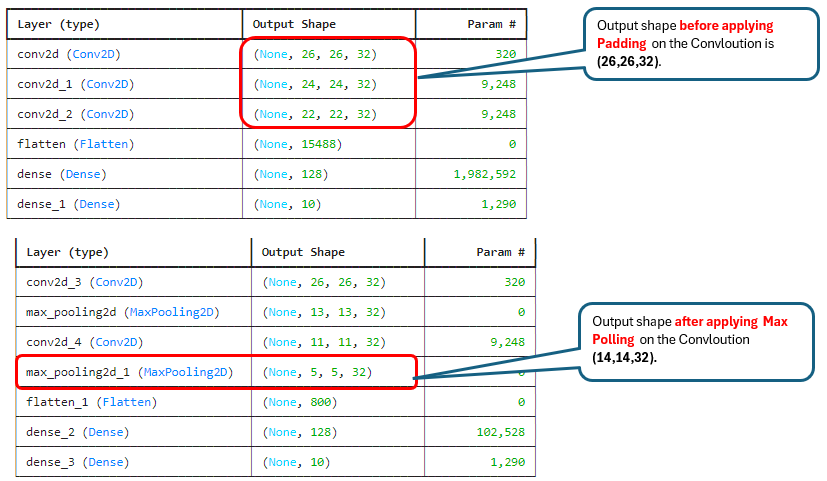